# Exploratory Data Analysis

In this section, we're going to investigate some of the data we've collected and see if we can uncover some interesting trends.

Questions that we would like to address:

* What are the top 5 states with highest number of positive cases and what trends are they showing currently?
* Does a states political polarity affect the number of positive cases?
* 

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('states_daily_preprocessed.csv')
df.head()

,Unnamed: 0,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,0,2020-10-03,AK,147,3819,473256,3966
1,1,2020-10-03,AL,1682,9707,1174699,10444
2,2,2020-10-03,AR,746,9936,1068412,10478
3,3,2020-10-03,AS,0,0,1616,0
4,4,2020-10-03,AZ,636,9040,1492856,9641


In [3]:
# Dropping Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)
df.head()

,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,2020-10-03,AK,147,3819,473256,3966
1,2020-10-03,AL,1682,9707,1174699,10444
2,2020-10-03,AR,746,9936,1068412,10478
3,2020-10-03,AS,0,0,1616,0
4,2020-10-03,AZ,636,9040,1492856,9641


## Inspecting Data

Ok, let's double-check the data types and see if there are any missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      11970 non-null  object
 1   state                     11970 non-null  object
 2   positiveIncrease          11970 non-null  int64 
 3   negativeIncrease          11970 non-null  int64 
 4   total                     11970 non-null  int64 
 5   totalTestResultsIncrease  11970 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 561.2+ KB


Whoops!  Looks like I forgot to change `date` to date-time format! Let's take care of that and set it as the index.

In [5]:
# Changing to Date-time
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11970 entries, 0 to 11969
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      11970 non-null  datetime64[ns]
 1   state                     11970 non-null  object        
 2   positiveIncrease          11970 non-null  int64         
 3   negativeIncrease          11970 non-null  int64         
 4   total                     11970 non-null  int64         
 5   totalTestResultsIncrease  11970 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 561.2+ KB


In [6]:
# Setting the 'date' column to index for time series manipulation.
df2 = df.set_index('date')
df2.head()

,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
date,,,,,
2020-10-03,AK,147,3819,473256,3966
2020-10-03,AL,1682,9707,1174699,10444
2020-10-03,AR,746,9936,1068412,10478
2020-10-03,AS,0,0,1616,0
2020-10-03,AZ,636,9040,1492856,9641


One last correction needs to be made.  The values under `total` represent the total number of tests performed, not confirmed positive cases.  So we'll rename this column to prevent confusion

In [7]:
df2 = df2.rename(columns={'total' : 'total_tests'})
df2.head()

,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
date,,,,,
2020-10-03,AK,147,3819,473256,3966
2020-10-03,AL,1682,9707,1174699,10444
2020-10-03,AR,746,9936,1068412,10478
2020-10-03,AS,0,0,1616,0
2020-10-03,AZ,636,9040,1492856,9641


Now that we've fixed that.  Let's make a few initial plots of the dataframe.  It'll be very messy, but we need to see what we're working with considering that we have both repeating states and dates, and a lot of data on VERY different scales.

<AxesSubplot:xlabel='date'>

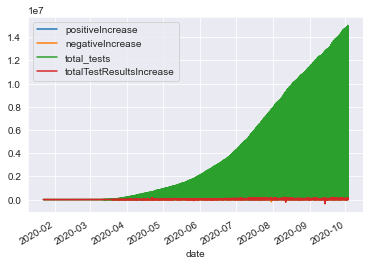

In [8]:
df2.plot()

Alright! So the `.plot()` method makes for a very confusing plot! On top of the fact that the values in `total` are on a Jovian scale compared to the other data points.  Also, even if data on the individual state level are present, they're indistinguishable.

Let's look at what happens if we focus in on only the daily increase of positive cases.

<AxesSubplot:xlabel='date'>

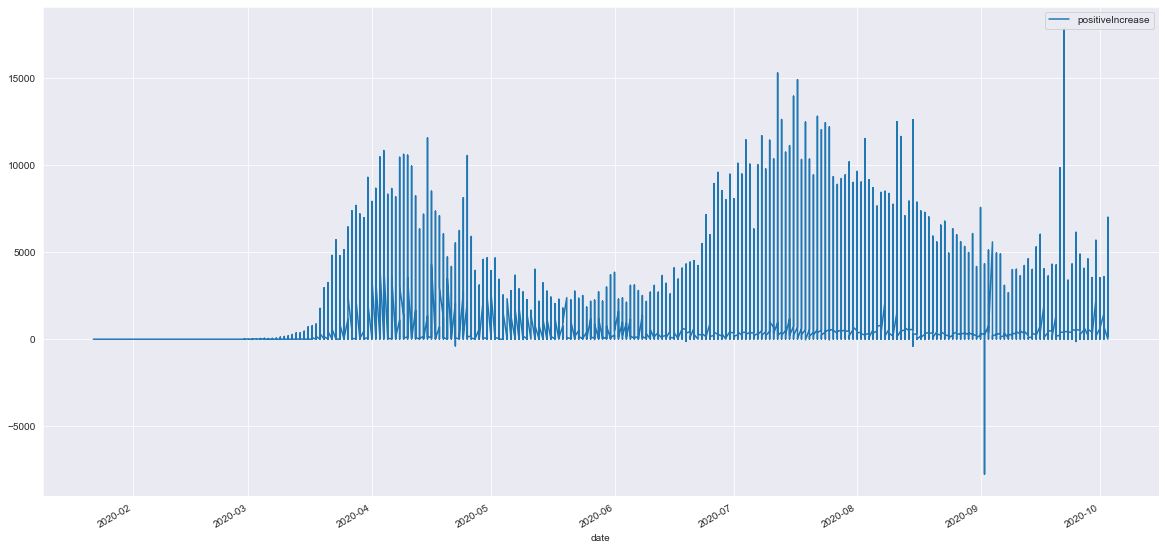

In [9]:
df2_drop = df2.drop(['total_tests', 'negativeIncrease','totalTestResultsIncrease'], 
                    axis=1)

df2_drop.plot(figsize=(20, 10))

It is certainly more clear, but there is still a problem with how we are still unable to distinguish the different cities.  I am very interested in seeing what state had the giant spike in cases in the last few days, though.  We'll put a pin in that for now, however.

For now, let's organize the data by creating different dataframes for each state and store these in a dictionary. 

# Organizing Data

In [10]:
states_complete = {}

for state in df2.state.unique():
    # Keys will be the state's acronym
    key = state 
    # Values are subsets of the dataframe relating to the respective state
    value = df2[df2['state'] == state].reset_index()
    states_complete[key] = value
    
    
states_complete['WA']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-10-03,WA,694,20361,1905759,21685
1,2020-10-02,WA,594,16021,1884704,15985
2,2020-10-01,WA,480,13210,1868089,13690
3,2020-09-30,WA,404,5532,1854399,5936
4,2020-09-29,WA,369,10888,1848463,11257
...,...,...,...,...,...,...
251,2020-01-26,WA,0,0,0,0
252,2020-01-25,WA,0,0,0,0
253,2020-01-24,WA,0,0,0,0
254,2020-01-23,WA,0,0,0,0


Now that everything is inside of a dictionary, we'll make a list of the keys so that we can iterate through the dictionary more easily.

In [11]:
states_complete['AZ']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-10-03,AZ,636,9040,1492856,9641
1,2020-10-02,AZ,551,6657,1483180,7136
2,2020-10-01,AZ,705,13119,1475972,13793
3,2020-09-30,AZ,323,3735,1462148,4047
4,2020-09-29,AZ,674,4164,1458090,4816
...,...,...,...,...,...,...
209,2020-03-08,AZ,0,0,56,0
210,2020-03-07,AZ,2,11,56,13
211,2020-03-06,AZ,1,5,51,6
212,2020-03-05,AZ,0,1,36,1


In [12]:
# Creating list of keys for performing iterations through dicitonary
keys = []

for key in df2.state.unique():
    keys.append(key)

keys[0:5]

['AK', 'AL', 'AR', 'AS', 'AZ']

# States with the Most COVID-19 Cases
Now that we've organized everything, let's find out which states have the most COVID cases.

In [13]:
# Creating dataframe for total number of positive cases per state

state_total_cases = []

for key in states_complete:
    state_total_cases.append(states_complete[key]['positiveIncrease'].sum())
    
state_totals = {}
for i in range(0, 56):
    key = keys[i]
    value = state_total_cases[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases = highest_cases.rename(columns={0:'total_positive'})
highest_cases.head(10)

,total_positive
AK,9187
AL,158380
AR,86525
AS,0
AZ,220397
CA,819383
CO,71896
CT,58297
DC,15473
DE,21125


Now that we've compiled all of this into a new dataframe, let's go ahead and plot this information.

## Total Cases by State

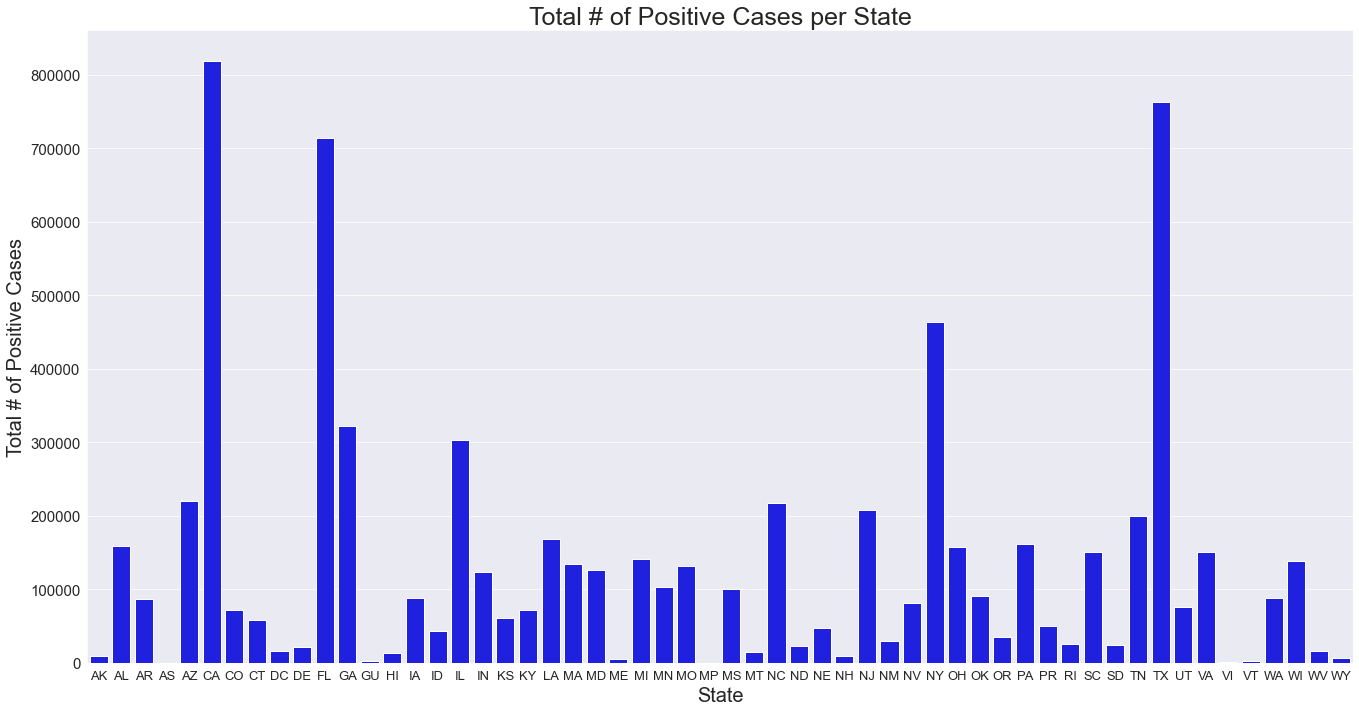

In [14]:
fig = plt.figure(figsize=(19, 10))

sns.barplot(highest_cases.index, 
            highest_cases['total_positive'], 
            color='blue')

plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=13)

plt.ylabel('Total # of Positive Cases', fontsize=20)
plt.yticks(fontsize=15)

plt.title('Total # of Positive Cases per State', fontsize=25)

plt.tight_layout()
plt.show();


Currently, our top 5 states are California, Texas, Florida, New York, and Georgia.  Now, I happen to know that, while New York was hit very hard at first, they made a great recovery.  Let's see if the same can be said of the other states.

### Current Trends

Since we're going to be doing this a few times, let's make a function that takes in a key and a column for a dataframe inside of our dictionary, and returns a dataframe that is formatted for time-series analysis.

In [15]:
def dict_to_timeseries(key, col):
    '''
    Input a key and a column name. 
    
    The function will take those to create a subset of the data for that key 
    consisting of the Date as an index, and 
    the specified column. 
    
    Output: Dataframe 
    '''
    # Creating an empty dictionary to store values
    temp_dict = {}
    
    # Retrieve information 
    for i in range(len(states_complete[key])):
        
        # Keys of dictionary will be the dates 
        k = states_complete[key]['date'][i]
        
        # Retrieve values in the specified column
        val = states_complete[key][col][i]
        
        # Storing values in dictionary
        temp_dict[k] = val    
    
    # Create dataframe from the dictionary with dates as the index
    ts_df = pd.DataFrame.from_dict(temp_dict, orient='index')
    
    # Rename the column to the name specified
    ts_df = ts_df.rename(columns={0 : key + '_' + col})
    
    return ts_df

# Test
CA = dict_to_timeseries('CA', 'positiveIncrease')
print(f"This is a {type(CA)} object")
CA.head()

This is a <class 'pandas.core.frame.DataFrame'> object


,CA_positiveIncrease
2020-10-03,2159
2020-10-02,3590
2020-10-01,3062
2020-09-30,3200
2020-09-29,2162


Now that we've got our function (and it works), it's time to go ahead make dataframes for our remaining 4 states.

In [16]:
TX = dict_to_timeseries('TX', 'positiveIncrease')
GA = dict_to_timeseries('GA', 'positiveIncrease')
NY = dict_to_timeseries('NY', 'positiveIncrease')
FL = dict_to_timeseries('FL', 'positiveIncrease')

In [17]:
top_5 = pd.concat([CA, TX, GA, NY, FL], axis=1, join='outer')
top_5.head(15)

,CA_positiveIncrease,TX_positiveIncrease,GA_positiveIncrease,NY_positiveIncrease,FL_positiveIncrease
2020-10-03,2159,7006,1444,1731,2787
2020-10-02,3590,3503,1300,1598,2660
2020-10-01,3062,3534,1308,1382,2628
2020-09-30,3200,5683,1720,1000,1948
2020-09-29,2162,3541,1025,1189,3266
2020-09-28,2955,4611,596,834,738
2020-09-27,4071,1694,812,866,1882
2020-09-26,4197,4886,1359,1005,2795
2020-09-25,3400,4633,1468,908,2847
2020-09-24,3170,4320,1368,955,2541


<AxesSubplot:>

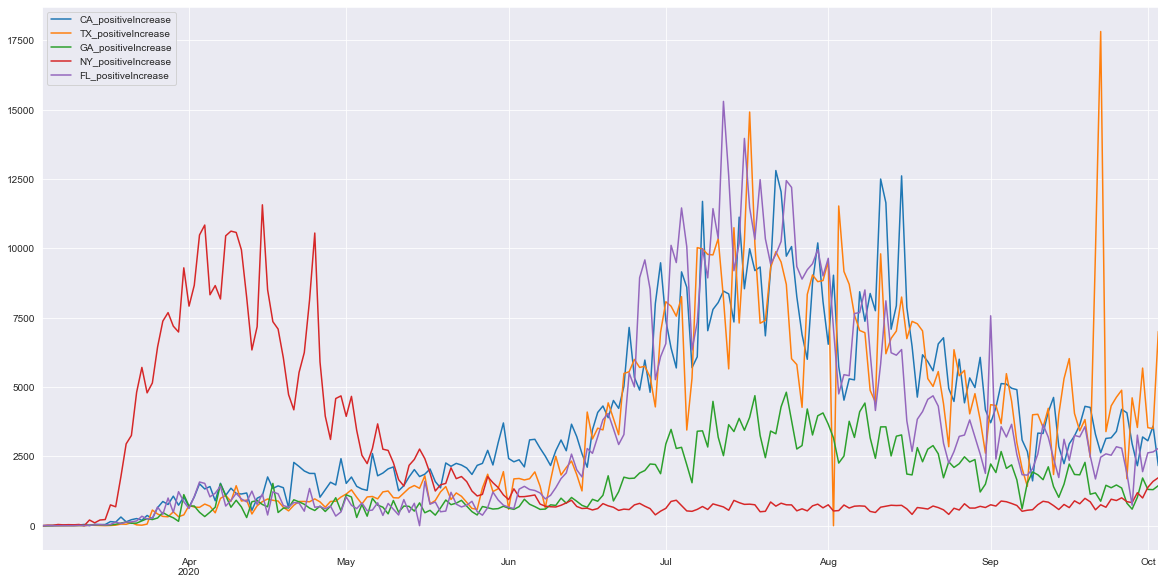

In [18]:
top_5.plot(figsize=(20, 10), legend=True)

This is a little messy, but I think it's important to see them all on a single graph so that we have more context when we look at the subplots.  Let's do that next!

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

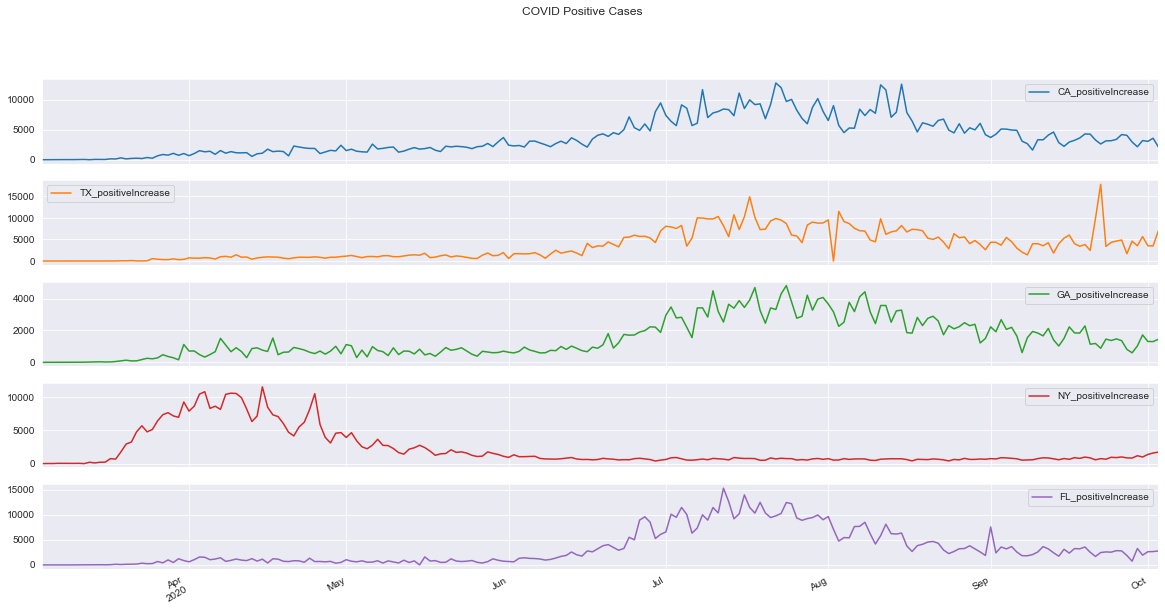

In [19]:
top_5.plot(figsize=(20, 10), subplots=True, legend=True, 
           title='COVID Positive Cases', )

As we mentioned earlier, New York was hit hard at the beginning, but stabilized since then.  The other states, on the other hand, seem to follow a trend, with exponential increase over the summer months and tapering down (with the exception of Texas' massive spike in cases) are tapering down and converging.

Two things stand out to me here.  One is that four out of five of these states seem increase in late June, peak in mid- to late July, and decrease as we enter the fall season.  What is so special about these summer months?

The second thing that stands out is how New York has sustained extremely low numbers while these other states were reaching their peak. This begs the question: What are they doing differently that sets them apart from these other states?   

### Is This a National Trend?

Before we answer these questions, let's got ahead and check for any other states that are following a similar trend

In [20]:
national = pd.DataFrame()

In [21]:
# Create a dataframe for national data. 

for key in keys:
    df = dict_to_timeseries(key, 'positiveIncrease')
    national = pd.concat([national, df], axis=1, join='outer')
# Checking for NaN values
national.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2020-01-22 to 2020-10-03
Freq: D
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AK_positiveIncrease  212 non-null    float64
 1   AL_positiveIncrease  211 non-null    float64
 2   AR_positiveIncrease  212 non-null    float64
 3   AS_positiveIncrease  202 non-null    float64
 4   AZ_positiveIncrease  214 non-null    float64
 5   CA_positiveIncrease  214 non-null    float64
 6   CO_positiveIncrease  213 non-null    float64
 7   CT_positiveIncrease  211 non-null    float64
 8   DC_positiveIncrease  213 non-null    float64
 9   DE_positiveIncrease  212 non-null    float64
 10  FL_positiveIncrease  214 non-null    float64
 11  GA_positiveIncrease  214 non-null    float64
 12  GU_positiveIncrease  202 non-null    float64
 13  HI_positiveIncrease  211 non-null    float64
 14  IA_positiveIncrease  212 non-null    float64
 15  ID_positiveIn

These new NaN values are only present because some of the states, such as Washington, had cases as early as January, while most others only started in March.  With this knowledge, we can comfortably infer that these missing values are zero and fill them accordingly. 

In [22]:
national = national.fillna(0).astype(int)
national.isna().any()

AK_positiveIncrease    False
AL_positiveIncrease    False
AR_positiveIncrease    False
AS_positiveIncrease    False
AZ_positiveIncrease    False
CA_positiveIncrease    False
CO_positiveIncrease    False
CT_positiveIncrease    False
DC_positiveIncrease    False
DE_positiveIncrease    False
FL_positiveIncrease    False
GA_positiveIncrease    False
GU_positiveIncrease    False
HI_positiveIncrease    False
IA_positiveIncrease    False
ID_positiveIncrease    False
IL_positiveIncrease    False
IN_positiveIncrease    False
KS_positiveIncrease    False
KY_positiveIncrease    False
LA_positiveIncrease    False
MA_positiveIncrease    False
MD_positiveIncrease    False
ME_positiveIncrease    False
MI_positiveIncrease    False
MN_positiveIncrease    False
MO_positiveIncrease    False
MP_positiveIncrease    False
MS_positiveIncrease    False
MT_positiveIncrease    False
NC_positiveIncrease    False
ND_positiveIncrease    False
NE_positiveIncrease    False
NH_positiveIncrease    False
NJ_positiveInc

Real quick, let's save this dataframe as a csv!

In [23]:
national.to_csv('national_positive_increase.csv')

Now let's plot out the national data and just follow the contours.  The criteria we're looking for is that the state must have:

* Lower numbers (relative to the state) prior to the summer 
* Increase as they enter summer (around May or June), 
* Generally peak in July or early August
* Begin to slope down as we get closer September and October.  

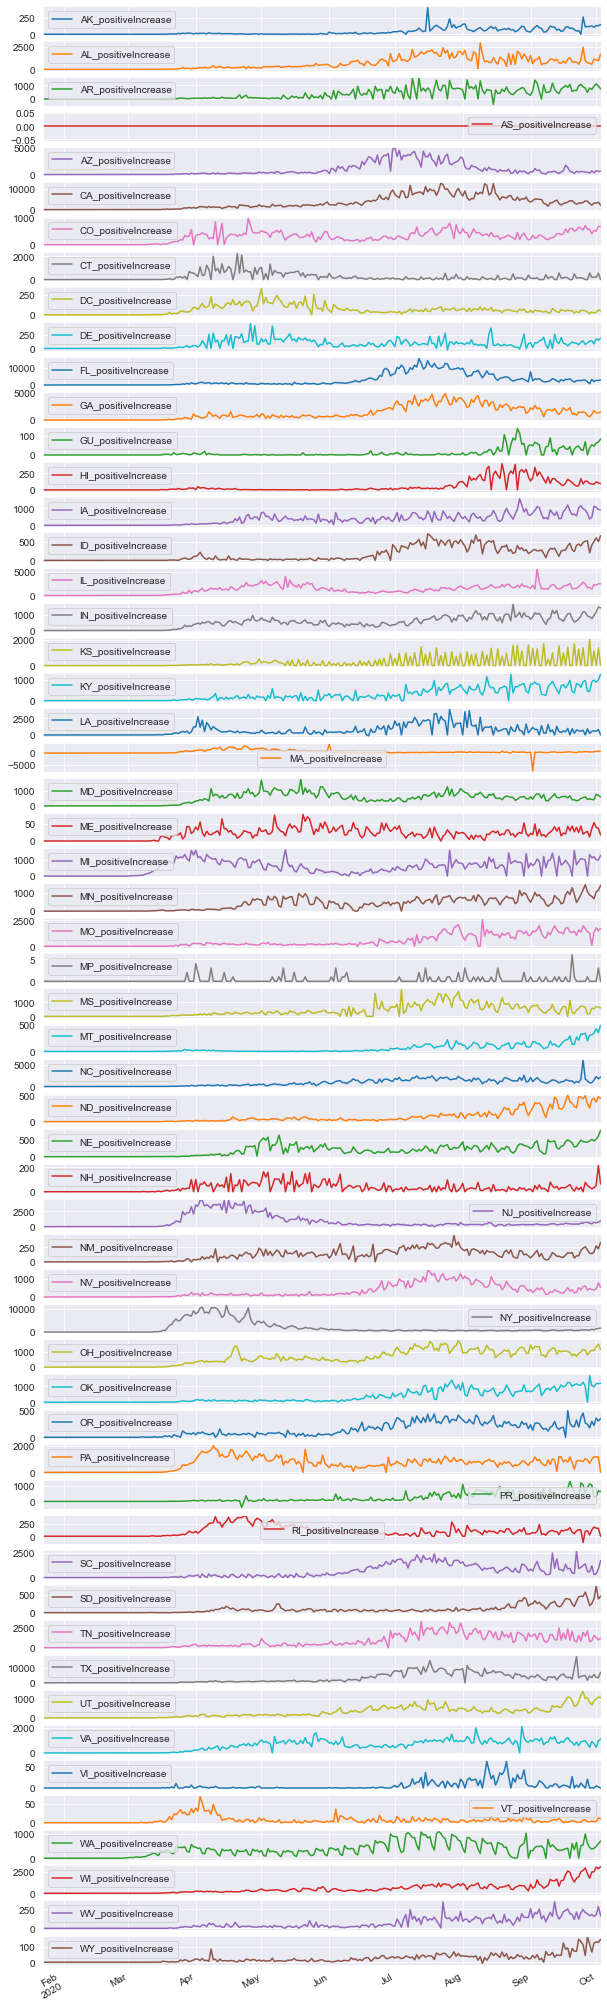

In [33]:
national.plot(figsize=(10, 40), subplots=True);

States with very low numbers (relatively) prior to the summer, then see an increase starting late June, peak in July, and lower towards beginning of fall:
**Alabama**, **Arizona**, **California**, **Florida**, **Georgia**, **Idaho\***, **Louisiana**, **Mississippi**, **Nevada**, **Ohio\***, **South Carolina**, **Tennessee**, **Texas**, **Utah**, **Washington\*\***, **Oregon\***, and **Missouri\***. 

**Note:** States with a **single asterisk (\*)** are states that have a similar trend but have **continued to increase in cases**.  **States with a double asterisk (\*\*)** are states that have had **relatively smaller, fluctuating numbers prior** to the summer season, but still see an increase in positive cases and a decrease leading into fall.

<AxesSubplot:>

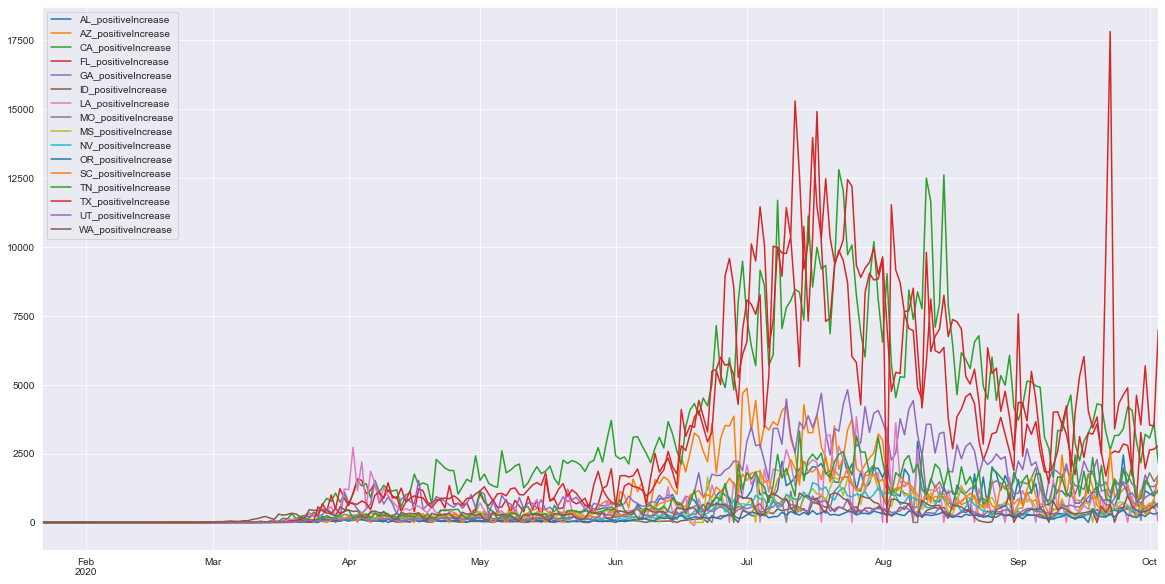

In [25]:
summer_trends = national[['AL_positiveIncrease', 'AZ_positiveIncrease', 
                          'CA_positiveIncrease', 'FL_positiveIncrease', 
                          'GA_positiveIncrease', 'ID_positiveIncrease', 
                          'LA_positiveIncrease', 'MO_positiveIncrease', 
                          'MS_positiveIncrease', 'NV_positiveIncrease', 
                          'OR_positiveIncrease','SC_positiveIncrease', 
                          'TN_positiveIncrease', 'TX_positiveIncrease', 
                          'UT_positiveIncrease', 'WA_positiveIncrease']]
summer_trends.plot(figsize=(20, 10))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

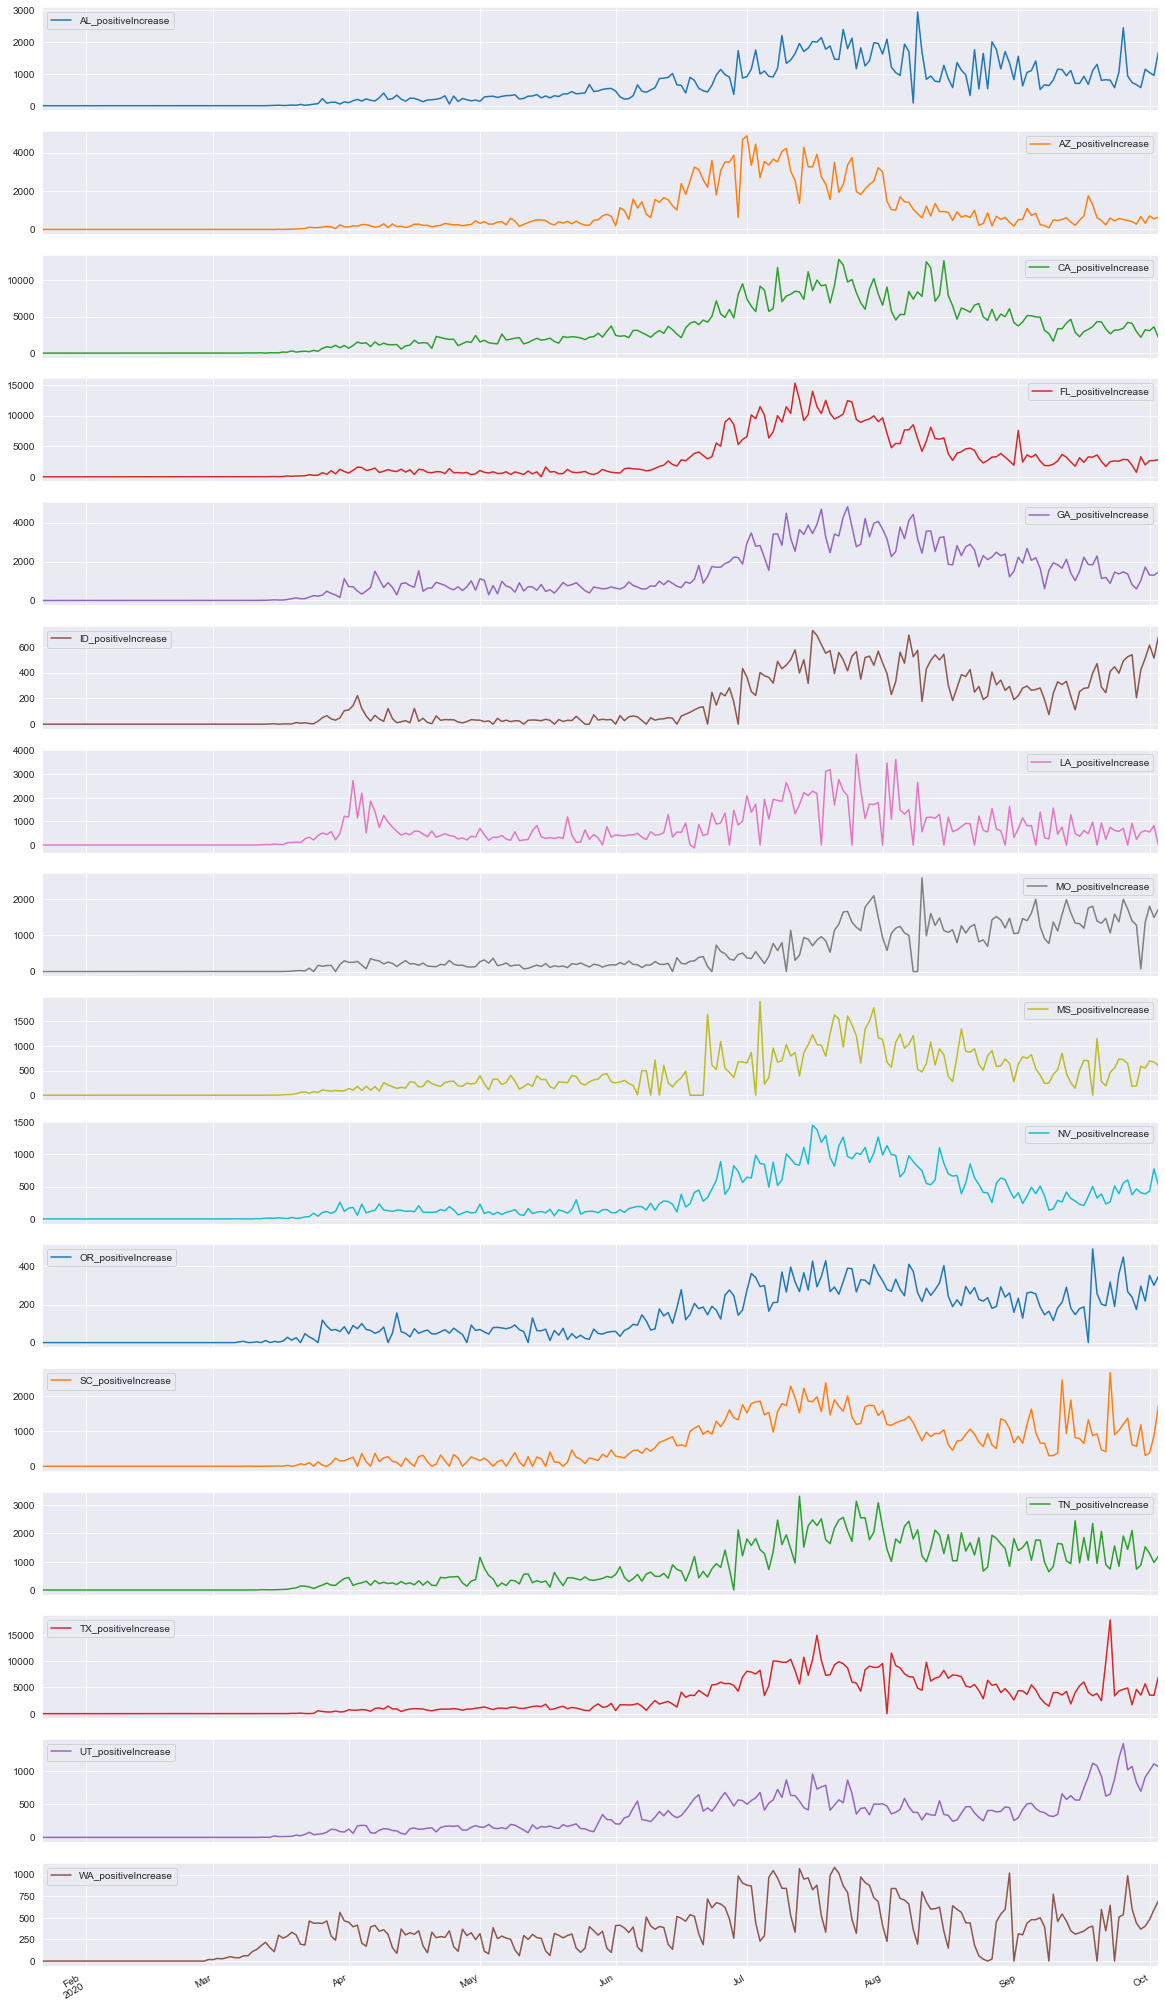

In [26]:
summer_trends.plot(figsize=(20, 40), subplots=True)

In [27]:
temp_dict = {}
for i in range(len(states_complete['CA'])):
    k = states_complete['CA']['date'][i]
    val = states_complete['CA']['positiveIncrease'][i]
    temp_dict[k] = val
time_df = pd.DataFrame.from_dict(temp_dict, orient='index')
time_df.head()

,0
2020-10-03,2159
2020-10-02,3590
2020-10-01,3062
2020-09-30,3200
2020-09-29,2162


In [28]:
MA = dict_to_timeseries('MA', 'positiveIncrease')
NV = dict_to_timeseries('NV', 'positiveIncrease')
DC = dict_to_timeseries('DC', 'positiveIncrease')
HI = dict_to_timeseries('HI', 'positiveIncrease')

tour = pd.concat([CA, MA, NV, NY, FL, DC, HI], axis=1, join='outer')
tour = tour.fillna(0).astype(int)
tour.head(15)

,CA_positiveIncrease,MA_positiveIncrease,NV_positiveIncrease,NY_positiveIncrease,FL_positiveIncrease,DC_positiveIncrease,HI_positiveIncrease
2020-01-22,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0
2020-01-31,0,0,0,0,0,0,0


<AxesSubplot:>

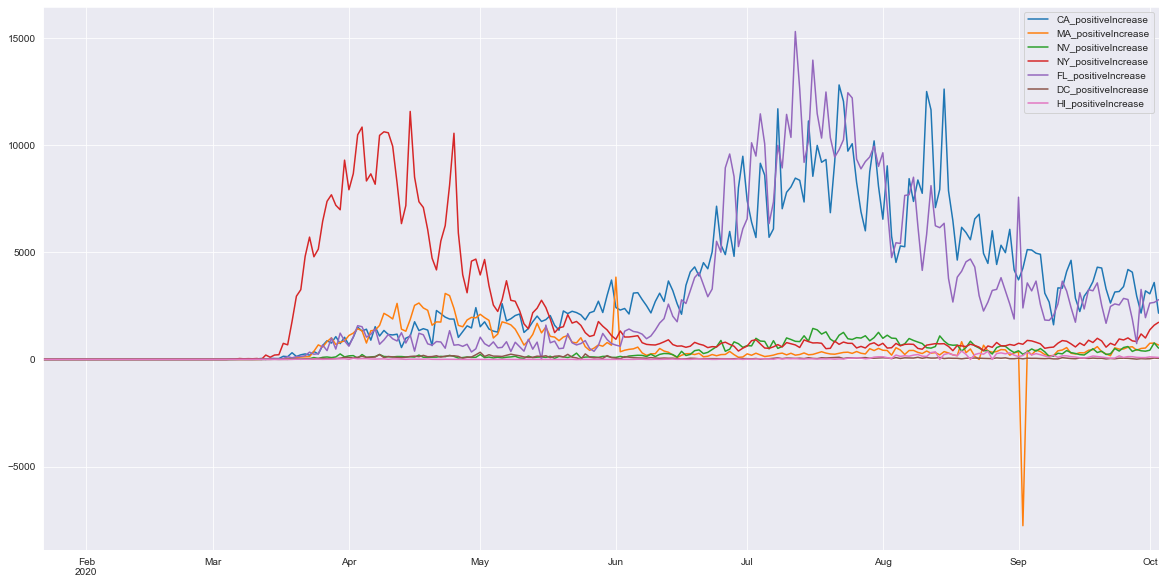

In [29]:
tour.plot(figsize=(20, 10))

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

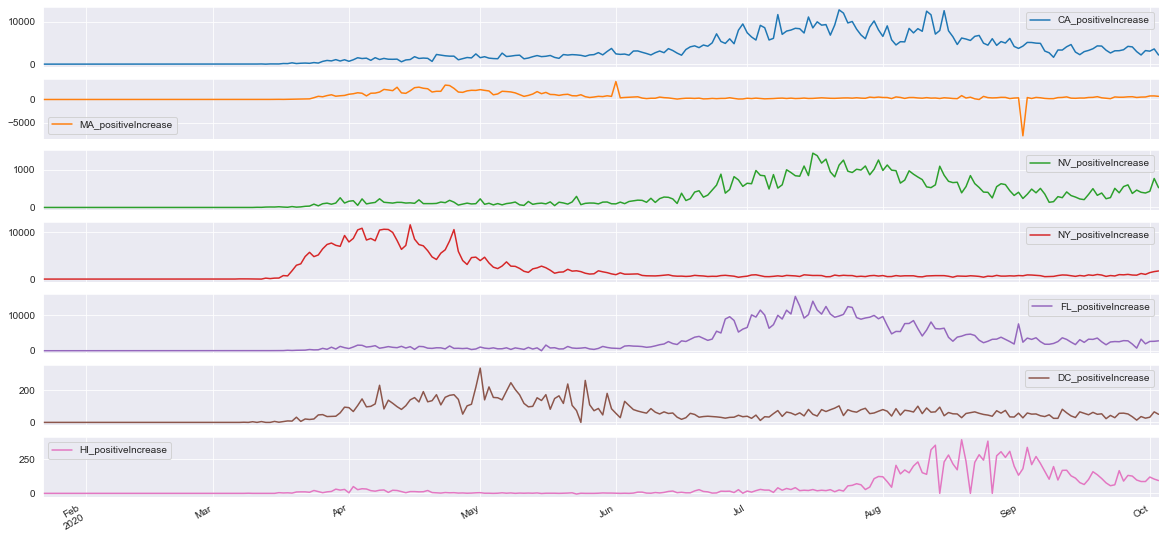

In [30]:
tour.plot(figsize=(20, 10), subplots=True)

<AxesSubplot:>

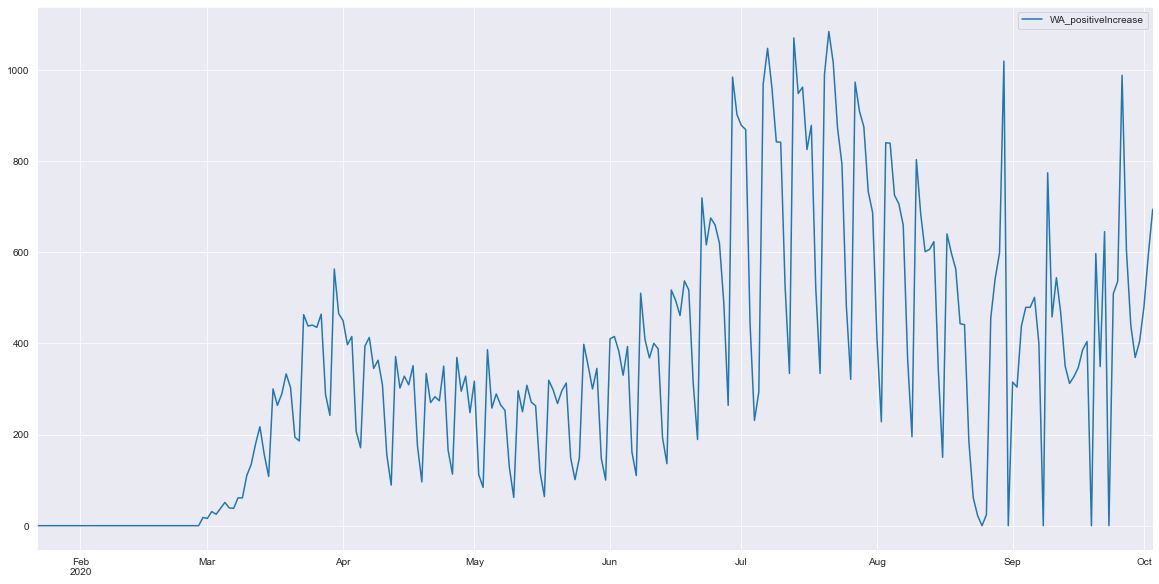

In [31]:
WA = dict_to_timeseries('WA', 'positiveIncrease')
WA.plot(figsize=(20, 10))

In [32]:
# for creating dataframes
state_totals = {}
for i in range(0, 56):
    key = state_list[i]
    value = state_total_max[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases.head()

NameError: name 'state_list' is not defined

In [ ]:
df_jhu = pd.read_csv('jhu_confirmed_preprocessed')
df_jhu = df_jhu.drop('Unnamed: 0', axis=1)
df_jhu.head()

In [ ]:
# checking number of states and territories
len(df_jhu.Province_State.unique())

In [ ]:
bama = df[df['Province_State'] == 'Alabama']

bama.info()

In [ ]:
fig = plt.figure(figsize=(40, 20))
bama.plot(figsize=(40, 20))
plt.xticks(ticks=np.arange(0, 69), labels=bama['Admin2'], rotation=90)
plt.show();

In [ ]:
jeff = bama[bama['Admin2'] == 'Jefferson']
jeff

In [ ]:
# creating a dataframe that is based on the 
swapped = df_jhu.swapaxes('index', 'columns')
swapped

In [ ]:
df_jhu.iloc[:,1]

In [ ]:
columns_list = []
for val in range(len(swapped.iloc[1])):
    columns_list.append(swapped.iloc[1][val])
columns_list

In [ ]:
# rename columns

for i in range(len(swapped.columns)):
    swapped = swapped.rename(columns={swapped.columns[i] : columns_list[i]})
    
swapped.head()
    

In [ ]:
swapped['Province_State']

In [ ]:
swappedunstack= swapped.unstack()
swapped_col = swapped_col.reset_index()
swapped_col.unstack(level=-1)
swapped_final = pd.merge(swapped, swapped_col, left_index=True)
swapped_final